<a href="https://colab.research.google.com/github/MariPron/My_First_Repo/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#1 Подключение библиотек
import pandas as pd     # для чтения и записи табличных файлов
import numpy as np      # для математической обработки данных
import matplotlib.pyplot as plt # для построения графиков

In [0]:
#2 Чтение данных

url = "https://drive.google.com/uc?export=download&id=130uKatSQ7Tpm4cAED2Q5H5C8WQSdDm8R"

input_df = pd.read_excel(url, header = 0) 

# вывод заголовка таблицы и первых пяти строк (сэмплов)
input_df.head()

,"Wind, m/s"
0,15.18
1,15.84
2,16.60
3,14.98
4,13.28


In [0]:
input_df.tail()

,"Wind, m/s"
715,4.94
716,2.84
717,2.56
718,2.18
719,1.80


In [0]:
input_df.describe()

,"Wind, m/s"
count,720.000000
mean,19.417361
std,8.543026
min,1.420000
25%,12.520000
50%,18.930000
75%,27.420000
max,34.540000


(720,)


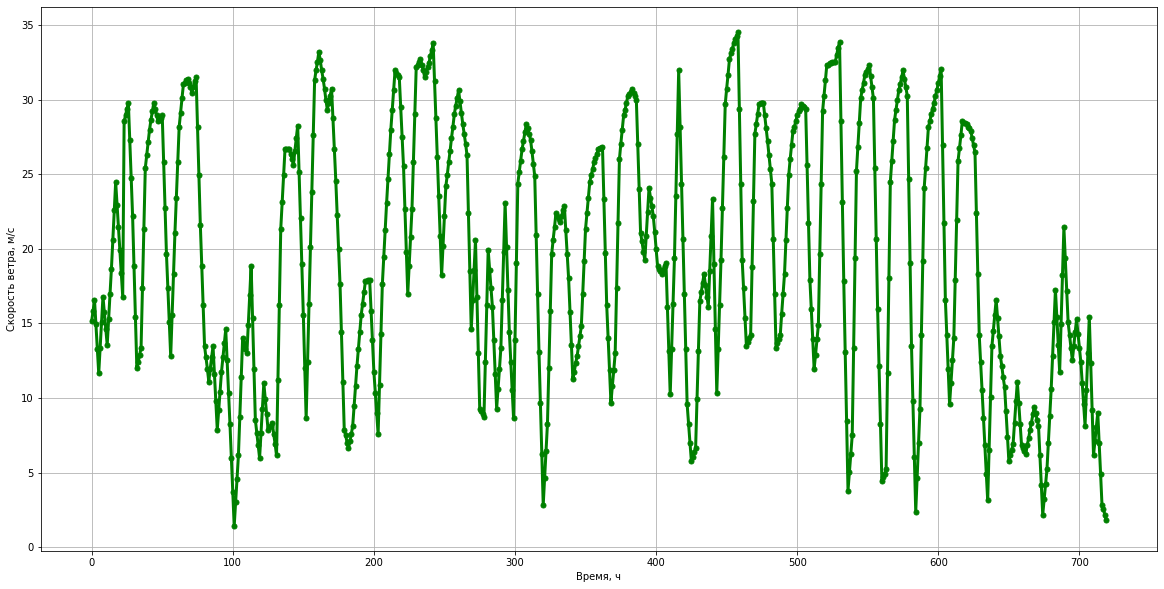

In [0]:
#Построение графика зависимости скорости ветра от времени
wind_speed = input_df.iloc[: , 0].values

print(wind_speed.shape)

fig, ax = plt.subplots(figsize = (20, 10))

ax.plot(wind_speed, linewidth = 3, markersize = 5, marker = 'o', color = 'green')
ax.grid(True)
ax.set_xlabel('Время, ч') 
ax.set_ylabel('Скорость ветра, м/с')

fig.savefig ('wind_speed.jpg')

plt.show()

#Построение аналогичного графика в библиотеке Bokeh

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

p = figure(plot_width = 800, plot_height = 400)

#Построение графиков скорости ветра и мощности
p.line(np.arange(len(wind_speed)), wind_speed*0.1, line_width = 2)

show(p)


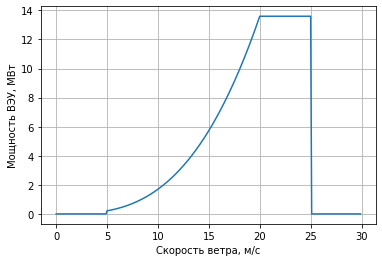

In [0]:
# 5. Зададим зависимость среднечасовой мощности, вырабатываемой ВЭУ, от средней скорости ветра
def wind_speed_to_power(speed):
  min_speed = 5
  transi_speed = 20
  max_speed = 25
  
  # выработка равна нулю, если скорость ветра выше максимальной или ниже минимальной
  # поэтому обнуляем такую скорость
  speed_tmp = np.where(np.logical_or(speed > max_speed, speed < min_speed), 0, speed)

  # если скорость выше переходной(20 м/с), то выработка не будет расти, добавляем ограничение сверху 
  speed_tmp = np.clip(speed_tmp, a_min = None, a_max = transi_speed)

  # на рабочем участке от min_speed до transi_speed мощность пропорциональна кубу скорости
  power = 0.0017 * (speed_tmp) ** 3
  return power

# отдельно создается график зависимости выработки от скорости ветра
x = np.arange(0, 30, 0.1)
fig, ax = plt.subplots()
ax.plot(x, wind_speed_to_power(x))
ax.grid(True)
ax.set_xlabel('Скорость ветра, м/с') 
ax.set_ylabel('Мощность ВЭУ, МВт')
plt.show()

#Построение аналогичного графика в библиотеке Bokeh

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

p = figure(plot_width = 800, plot_height = 400)

p.line(x, wind_speed_to_power(x), line_width = 2)

fig.savefig ('wind_speed_to_power.jpg')

show(p)

#Расчет среднесуточной мощности
averPow = np.zeros (30)
for i in range(1, 30):
  averPow[i] = sum(wind_speed_to_power(wind_speed)[1+24*(i-1) : 24*i])
    

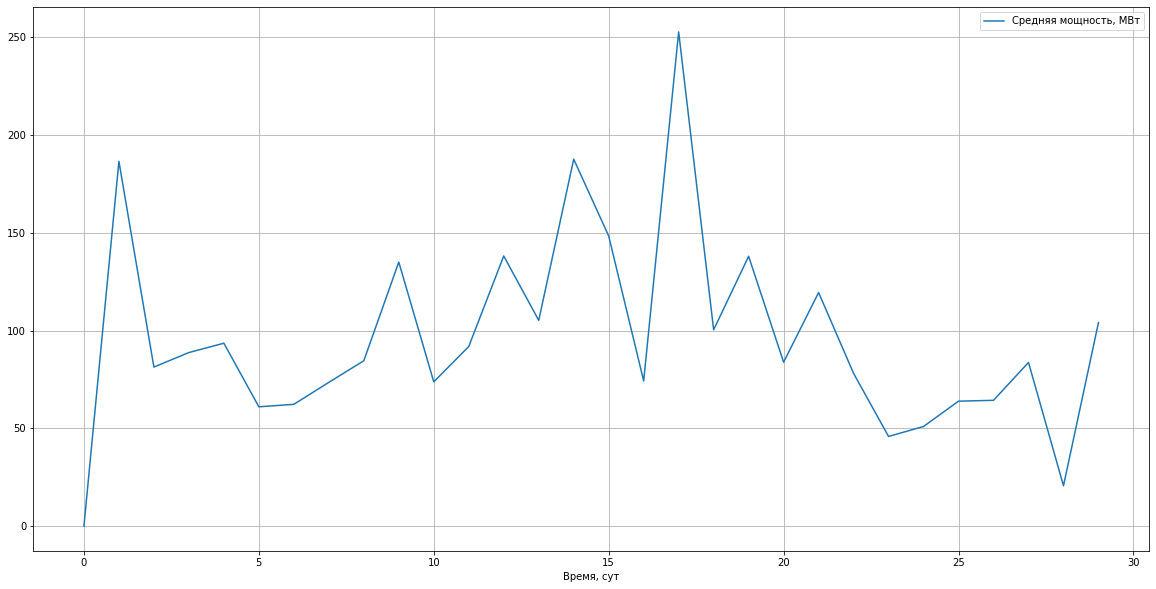

In [0]:
#6 Построение графика среднесуточной мощности
fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(averPow)

ax.grid(True)
ax.set_xlabel('Время, сут') 
ax.legend(['Средняя мощность, МВт'])

fig.savefig ('average_power.jpg')

plt.show()

#Построение аналогичного графика в библиотеке Bokeh

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

p = figure(plot_width = 800, plot_height = 400)

p.line(np.arange(len(averPow)), averPow, line_width = 2)

show(p)

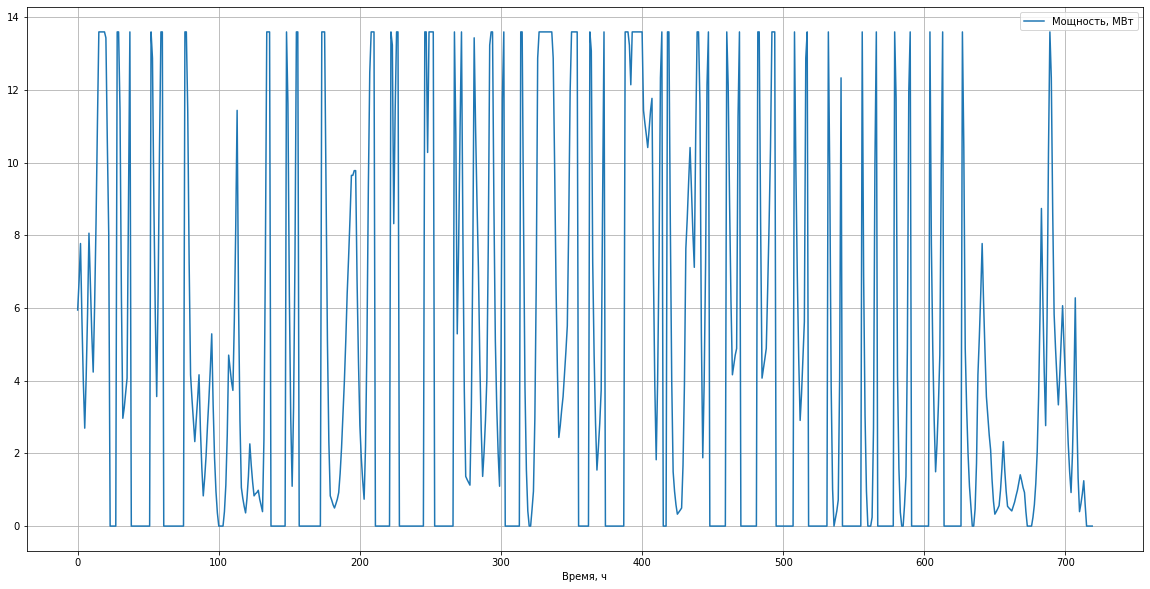

In [0]:
#7 Построение графика мощьности от времени
fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(wind_speed_to_power(wind_speed))

ax.grid(True)
ax.set_xlabel('Время, ч') 
ax.legend(['Мощность, МВт'])

fig.savefig ('power.jpg')

plt.show()

In [0]:
#8 Cохранение всех графиков
data_frame = pd.DataFrame(wind_speed)
data_frame.to_excel('wind_speed.xlsx', index = False, header = ['скорость ветра м/с'])

data_frame = pd.DataFrame(wind_speed_to_power(x))
data_frame.to_excel('wind_speed_to_power.xlsx', index = False, header = ['Мощьность ветра'])

data_frame = pd.DataFrame(averPow)
data_frame.to_excel('average_power.xlsx', index = False, header = ['Средняя мощность МВт'])

data_frame = pd.DataFrame(wind_speed_to_power(wind_speed))
data_frame.to_excel('power.xlsx', index = False, header = ['Мощность МВт'])